https://www.kaggle.com/datasets/mirichoi0218/insurance/

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [9]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64","float64"]) & (df[col].nunique()>40)]
num_cols.pop()
num_cols

['age', 'bmi']

In [10]:
cat_cols = [col for col in df.columns if df[col].nunique()<6]
cat_cols

['sex', 'smoker', 'region']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
#Encoding
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df["sex"])
df['smoker_encoded'] = le.fit_transform(df["smoker"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   sex             1337 non-null   object 
 2   bmi             1337 non-null   float64
 3   children        1337 non-null   int64  
 4   smoker          1337 non-null   object 
 5   region          1337 non-null   object 
 6   charges         1337 non-null   float64
 7   sex_encoded     1337 non-null   int32  
 8   smoker_encoded  1337 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(3)
memory usage: 94.0+ KB


In [13]:
df.drop(['sex','smoker','region'], axis = 1, inplace = True)

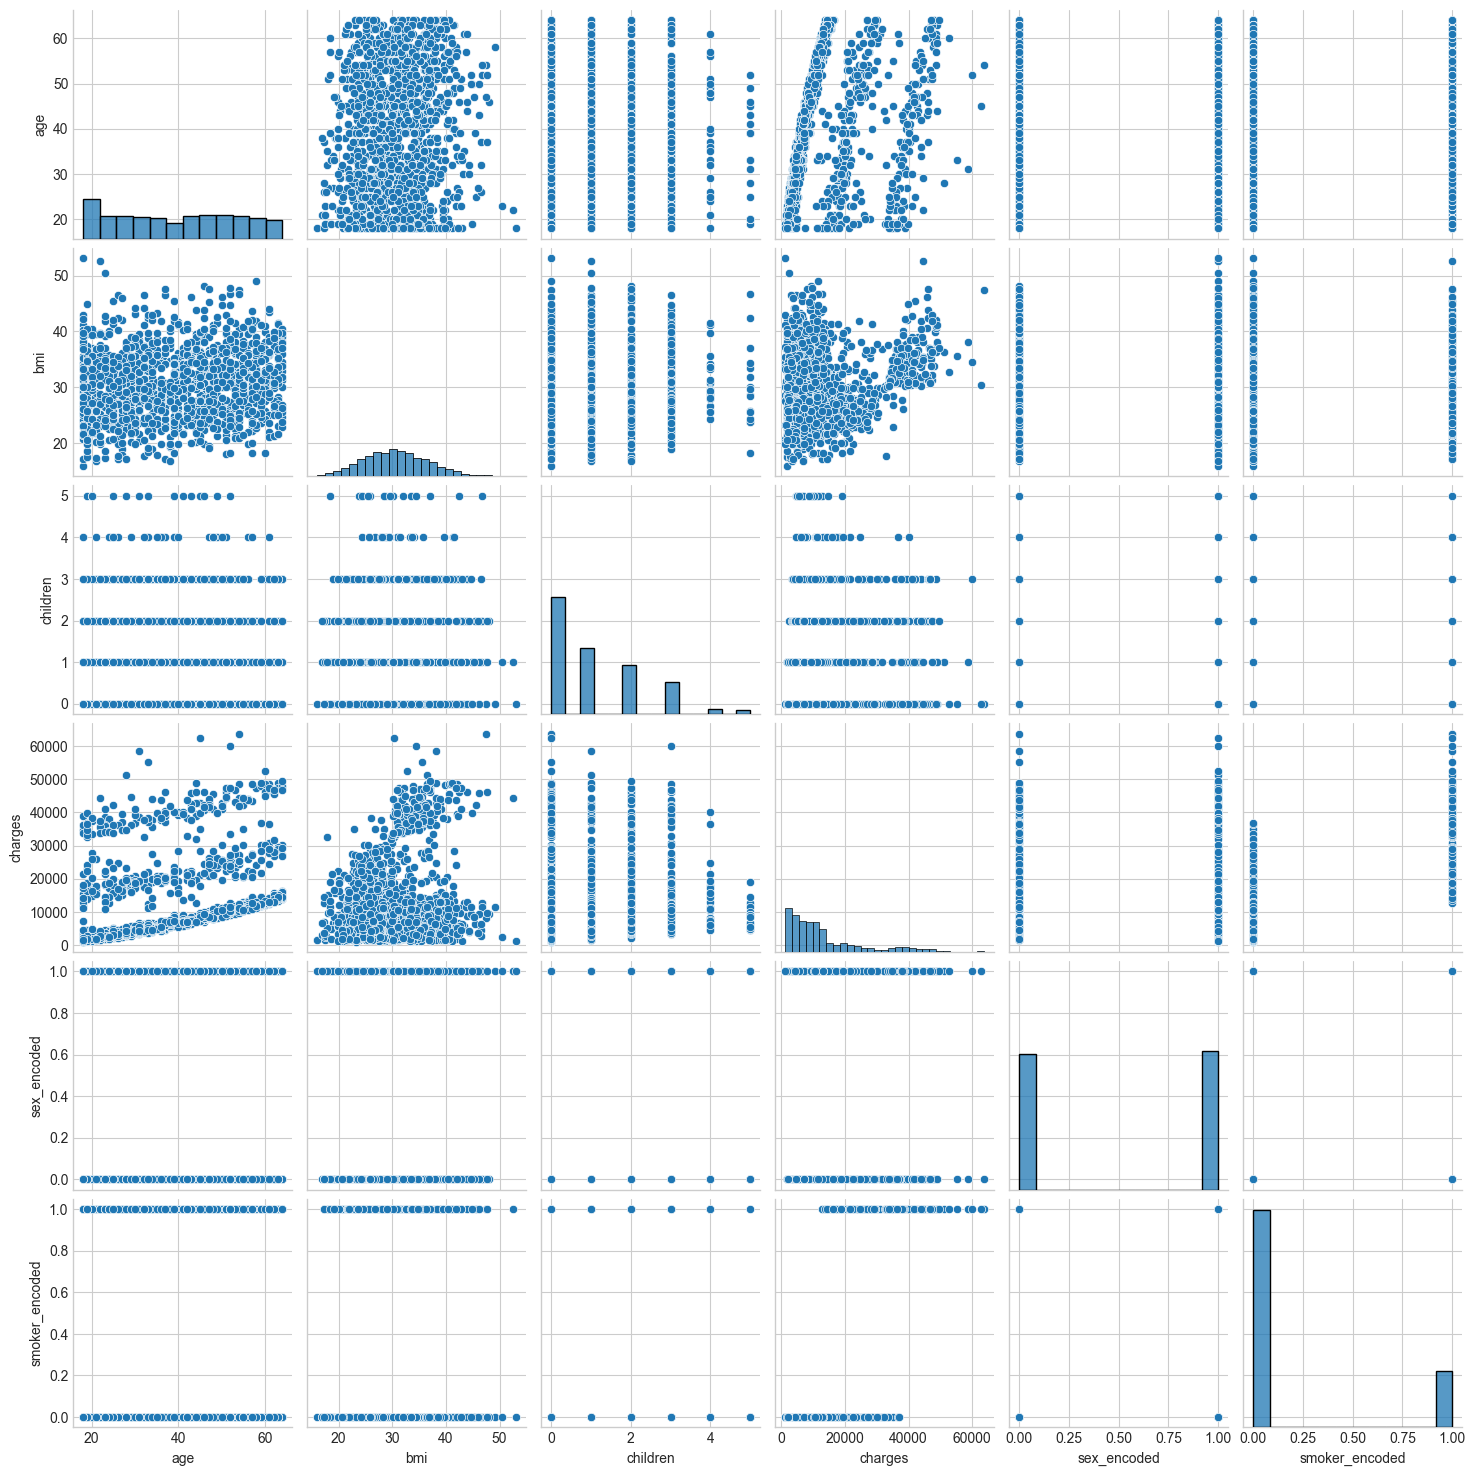

In [14]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
# plt.savefig('pairplor.png')

Text(0.5, 0, 'Age')

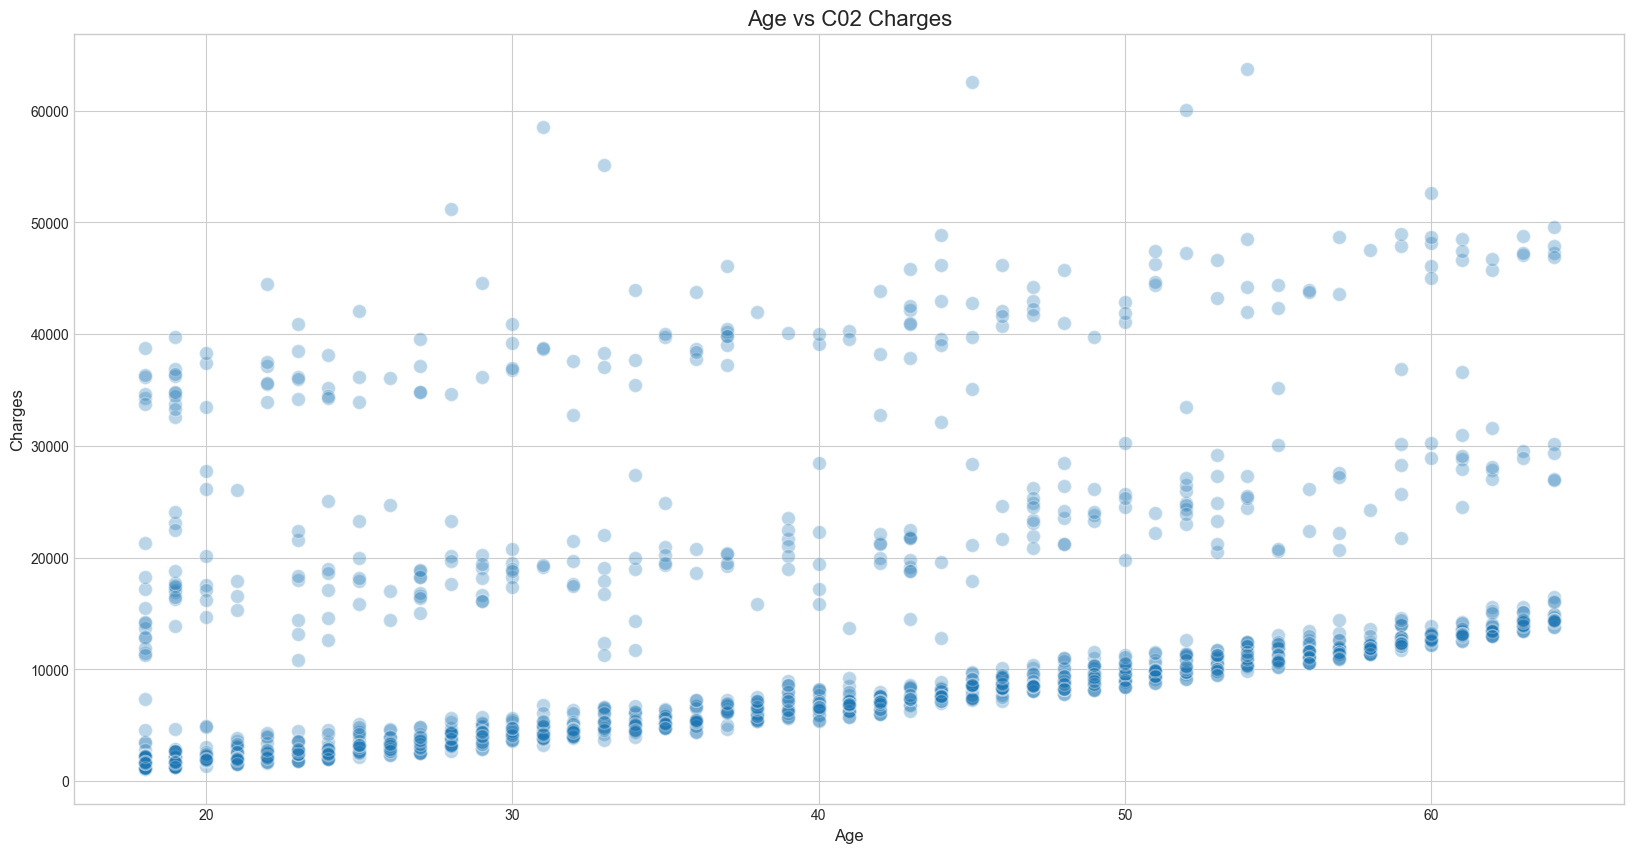

In [15]:
plt.scatter(x = 'age', y = 'charges', 
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('Age vs C02 Charges', fontsize = 16)
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Age', fontsize = 12)

# plt.savefig('enginesize_co2.png')

Text(0.5, 0, 'BMI')

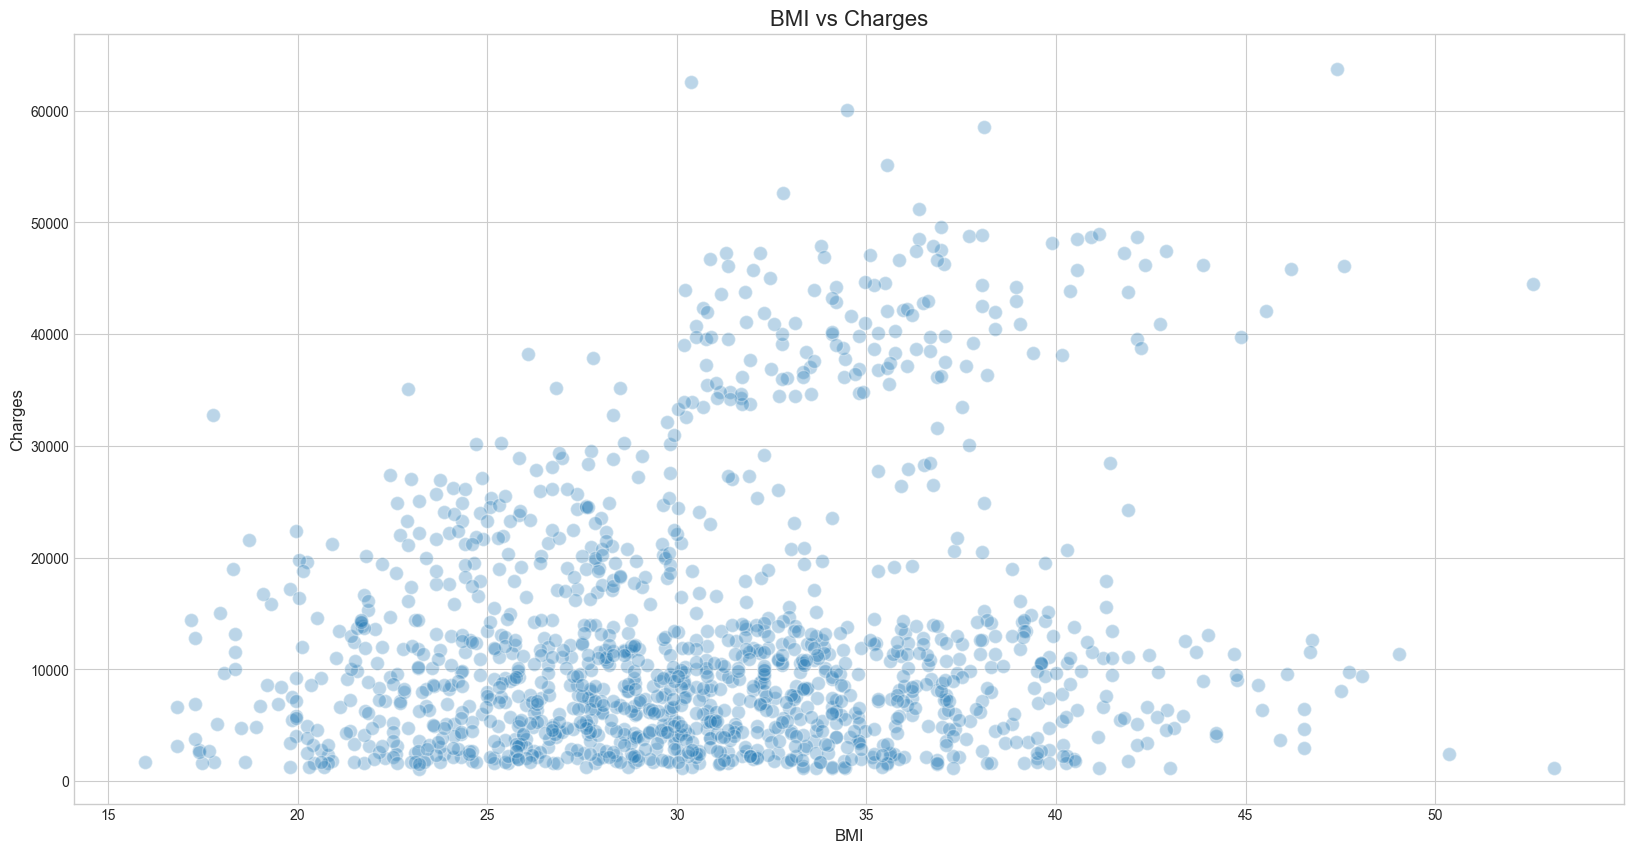

In [17]:
plt.scatter(x = 'bmi', y = 'charges', 
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('BMI vs Charges', fontsize = 16)
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('BMI', fontsize = 12)

Text(0.5, 0, 'Children')

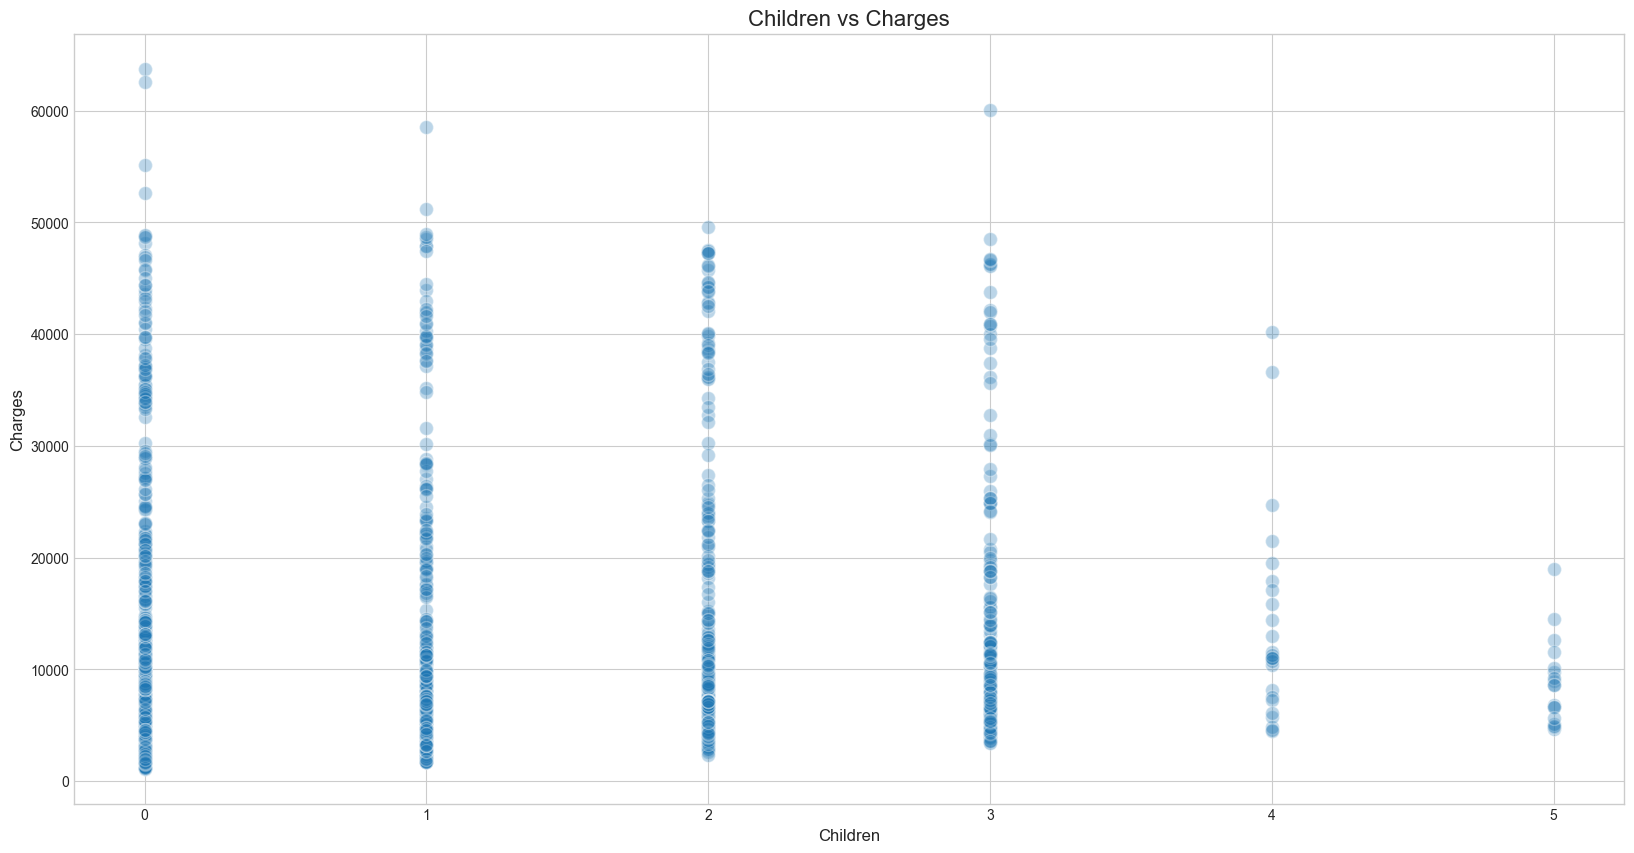

In [18]:
plt.scatter(x = 'children', y = 'charges', 
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('Children vs Charges', fontsize = 16)
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Children', fontsize = 12)

## SLR

In [19]:
from sklearn.model_selection import train_test_split

X_var = df[['bmi']] # independent variable
y_var = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("r2_score : ", r2_score(y_test, yhat))
print("\nRMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.05879287466812988

RMSE :  12414.977194951443


Text(0.5, 0, 'BMI')

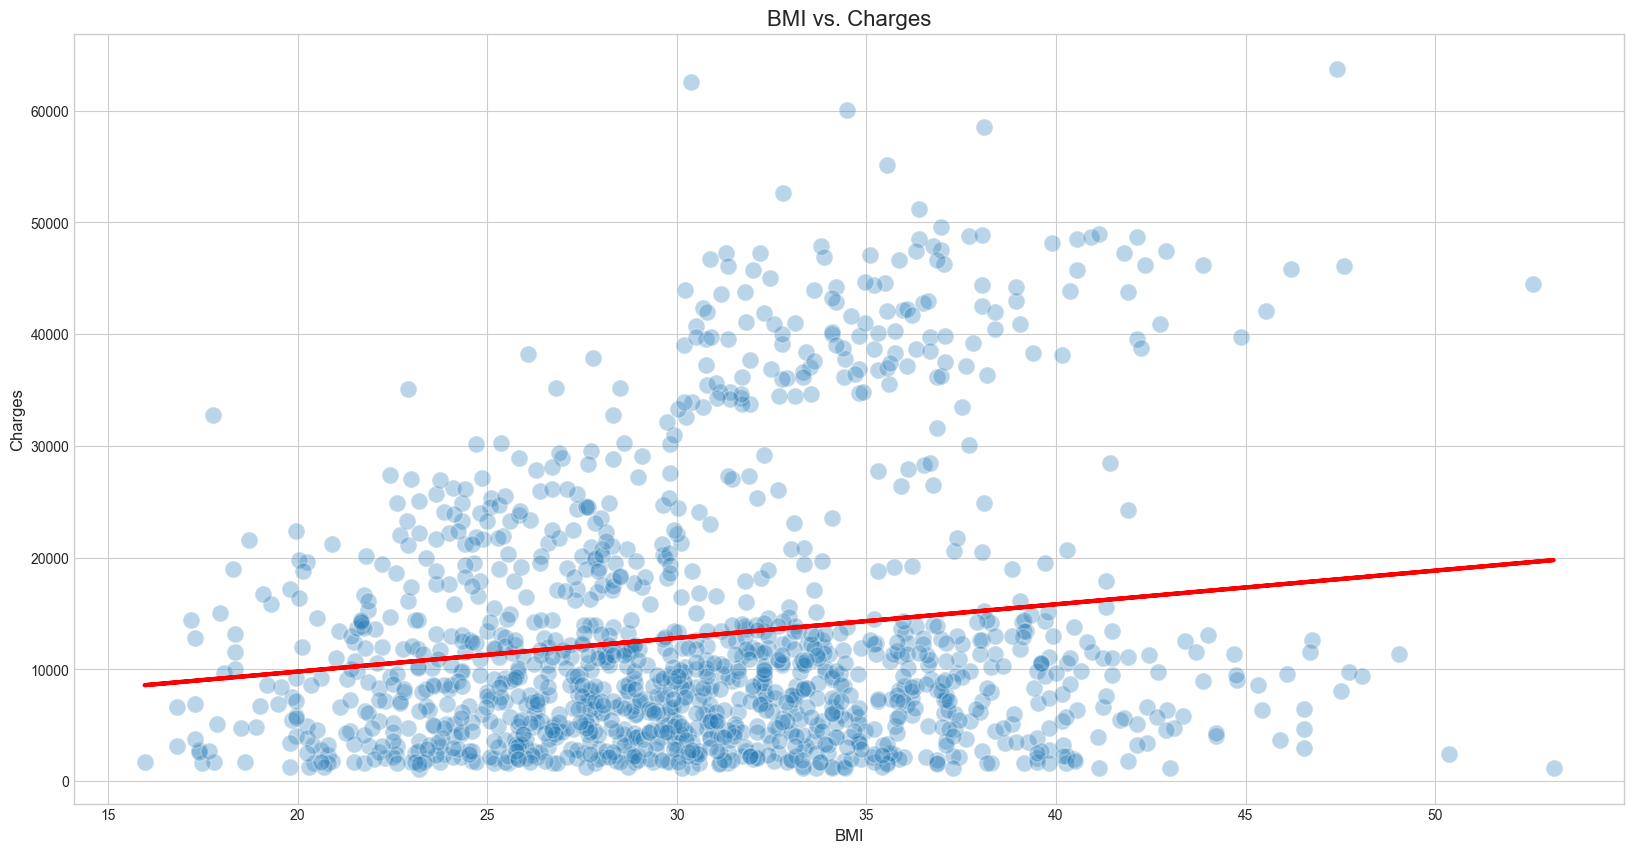

In [20]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'bmi', y = 'charges', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['bmi'], slr_slope*df['bmi'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('BMI vs. Charges', fontsize = 16)
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('BMI', fontsize = 12)

In [21]:
X_var = df[['age']] # independent variable
y_var = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("r2_score : ", r2_score(y_test, yhat))
print("\nRMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.10739068301367427

RMSE :  12090.215190284043


Text(0.5, 0, 'Age')

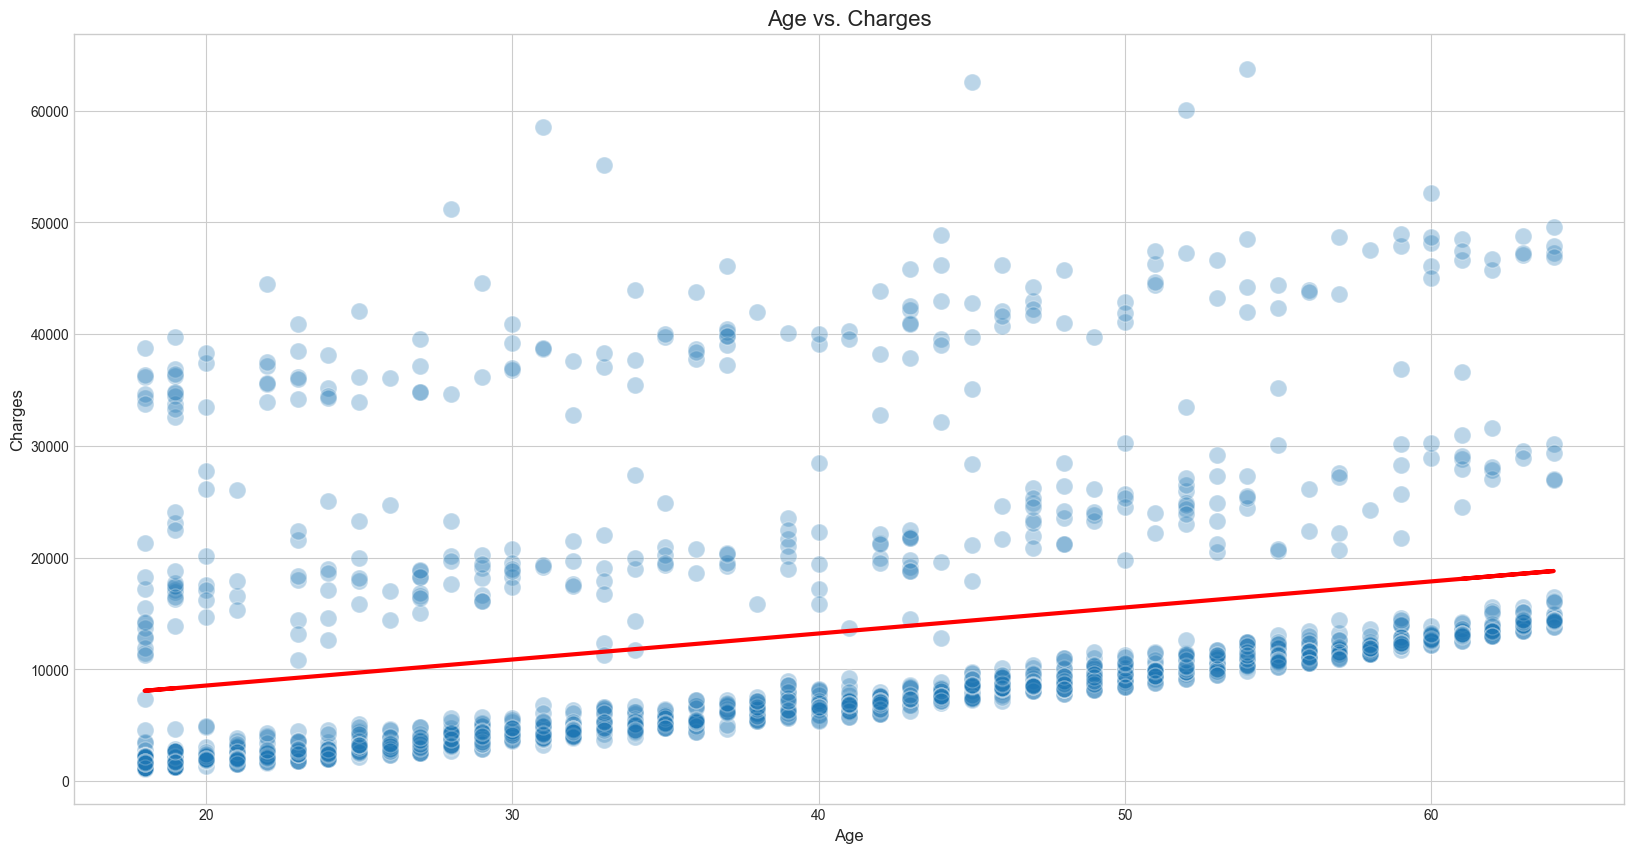

In [22]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'age', y = 'charges', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['age'], slr_slope*df['age'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('Age vs. Charges', fontsize = 16)
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Age', fontsize = 12)

## MLR

In [23]:
X1_var = df[['age',
		'sex_encoded',
		'bmi',
		'children', 'smoker_encoded']]
y_var = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("r2_score : ", r2_score(y_test, yhat))
print("RMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.7628628713029458
RMSE :  6231.650692469463


C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

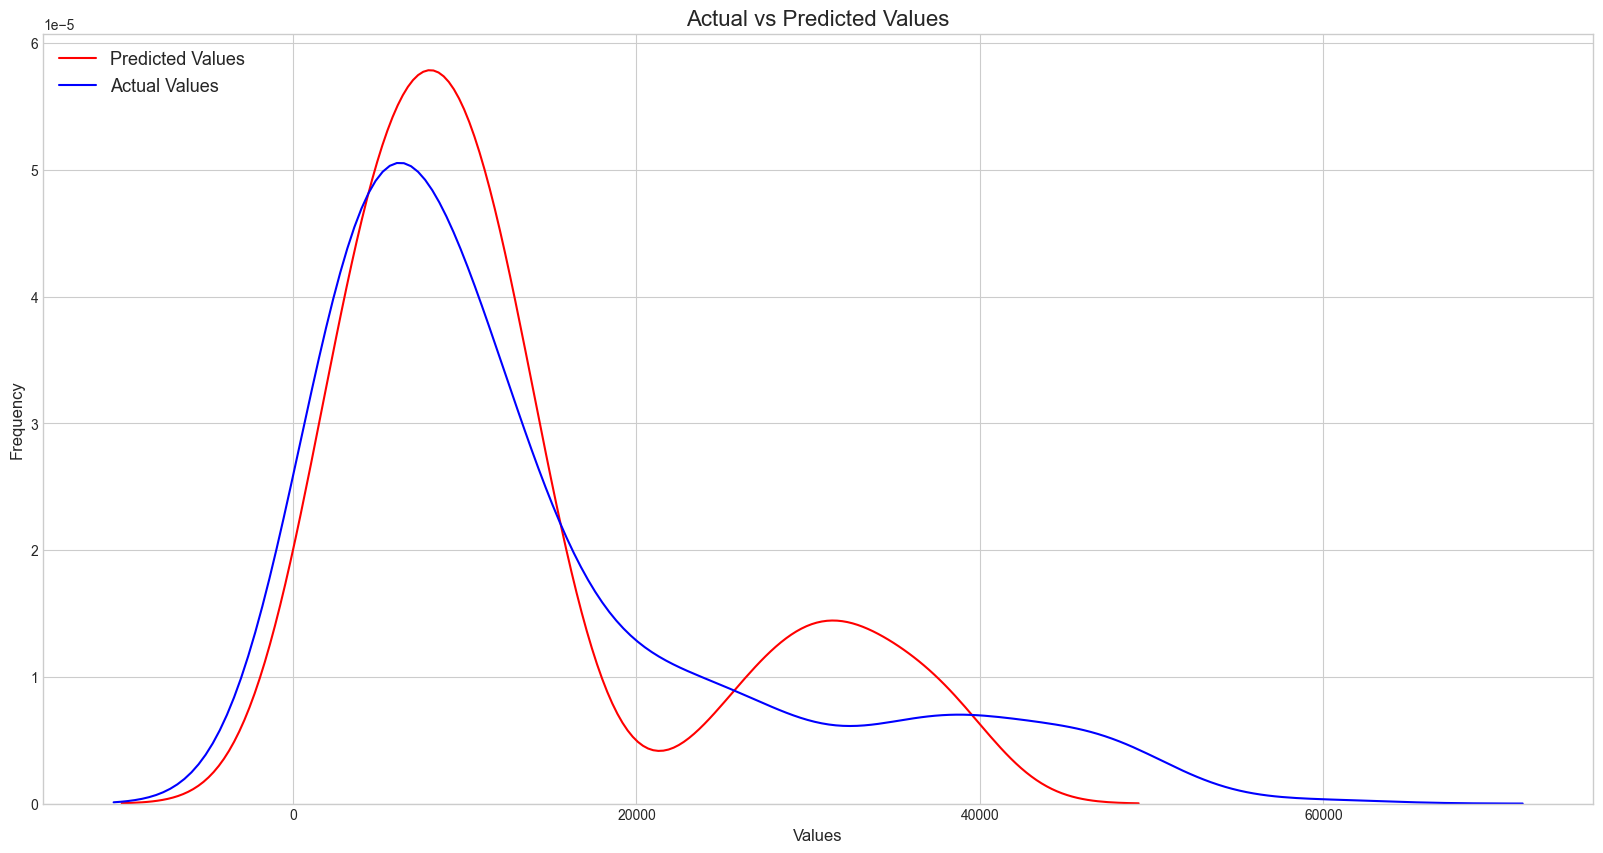

In [25]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [26]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 10)
ada.fit(X_train, y_train)
yhat = ada.predict(X_test)

print("r2_score : ", r2_score(y_test, yhat))
print("RMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.8324056069322128
RMSE :  5238.815038310321


C:\Users\user\AppData\Local\Temp\ipykernel_18872\3131535560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\user\AppData\Local\Temp\ipykernel_18872\3131535560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.dist

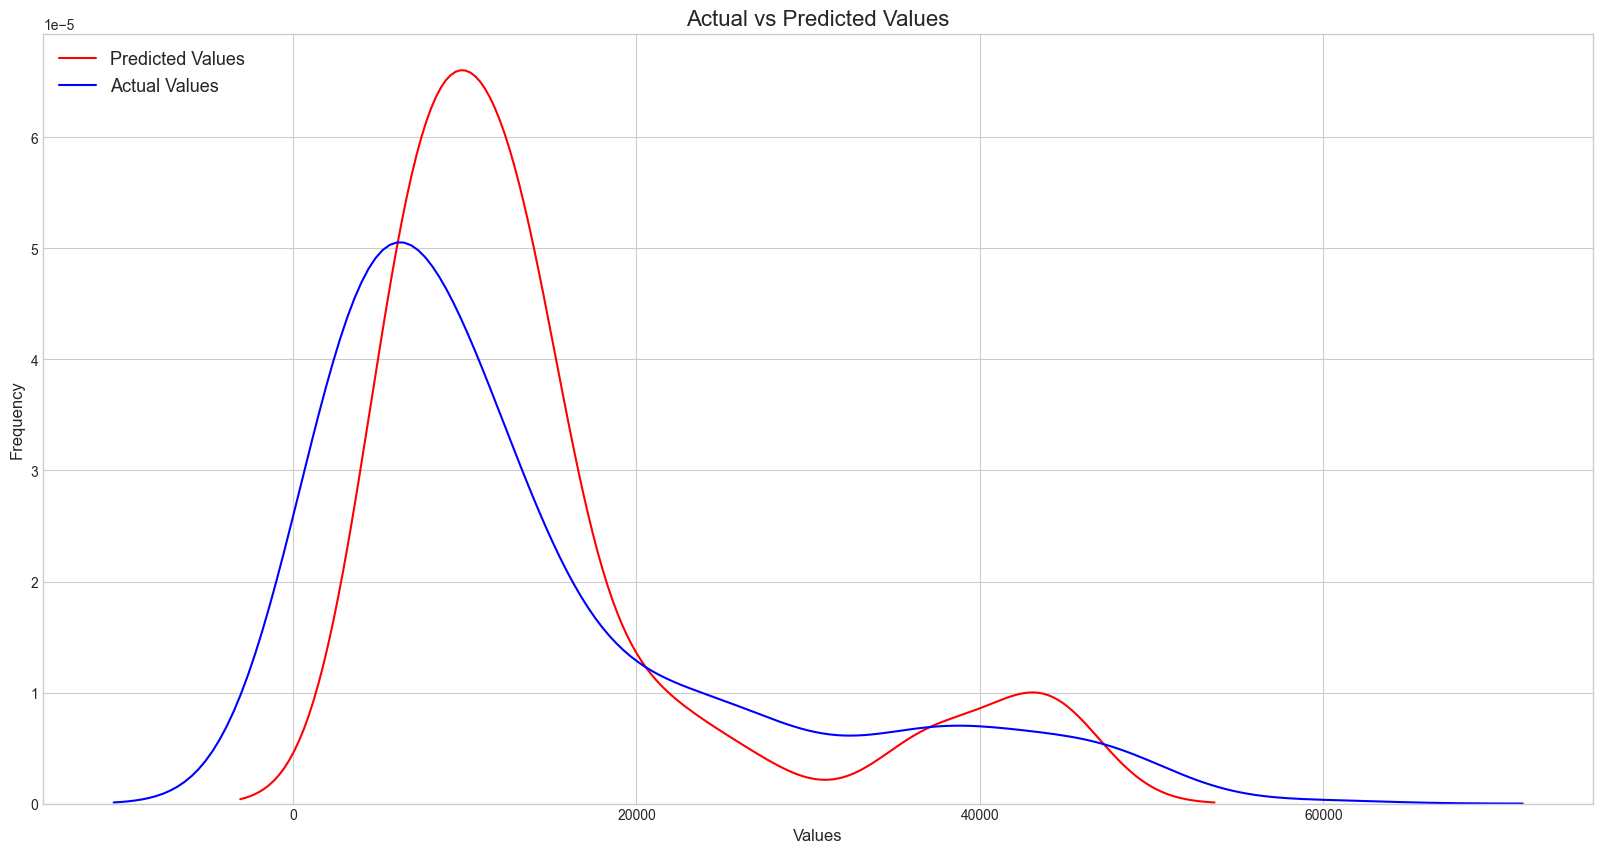

In [27]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# plt.savefig('ap.png')

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

print("r2_score : ", r2_score(y_test, yhat))
print("RMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.8387507320057633
RMSE :  5138.687396177137


C:\Users\user\AppData\Local\Temp\ipykernel_18872\3131535560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\user\AppData\Local\Temp\ipykernel_18872\3131535560.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.dist

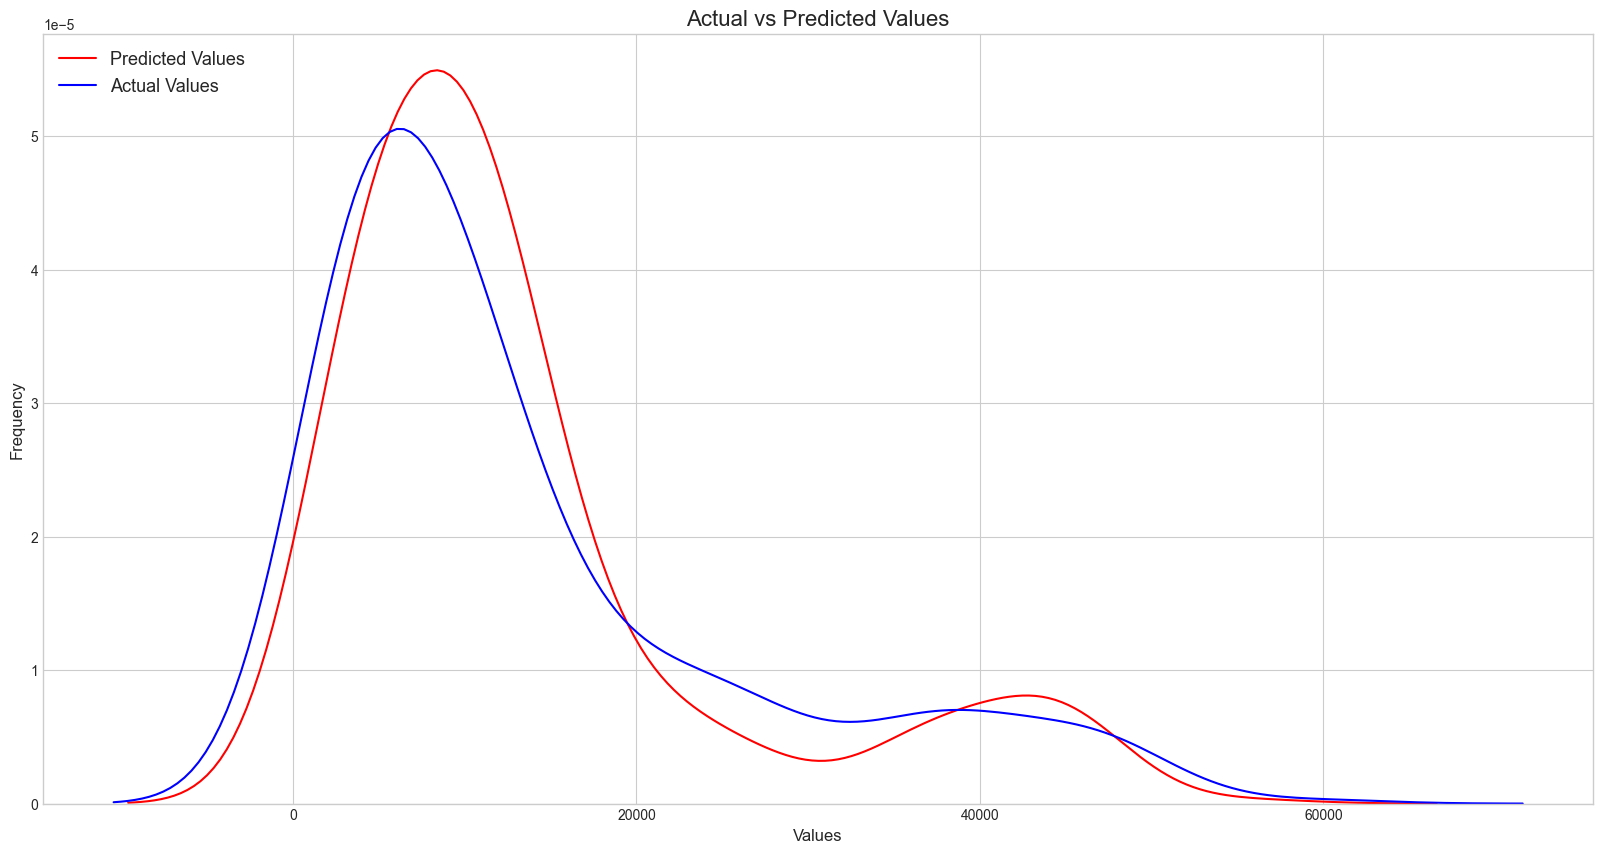

In [29]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# plt.savefig('ap.png')

In [34]:
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)

X1_var = df[['age',
		'sex_encoded',
		'bmi',
		'children', 'smoker_encoded']]
y_var = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_train, y_train)
voting_pred = ereg.predict(X_test)

print('r2_score : ', r2_score(y_test, voting_pred))
print('RMSE : ', mean_squared_error(y_test, voting_pred, squared=False))

r2_score :  0.8511211786032603
RMSE :  4937.64410849753


C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

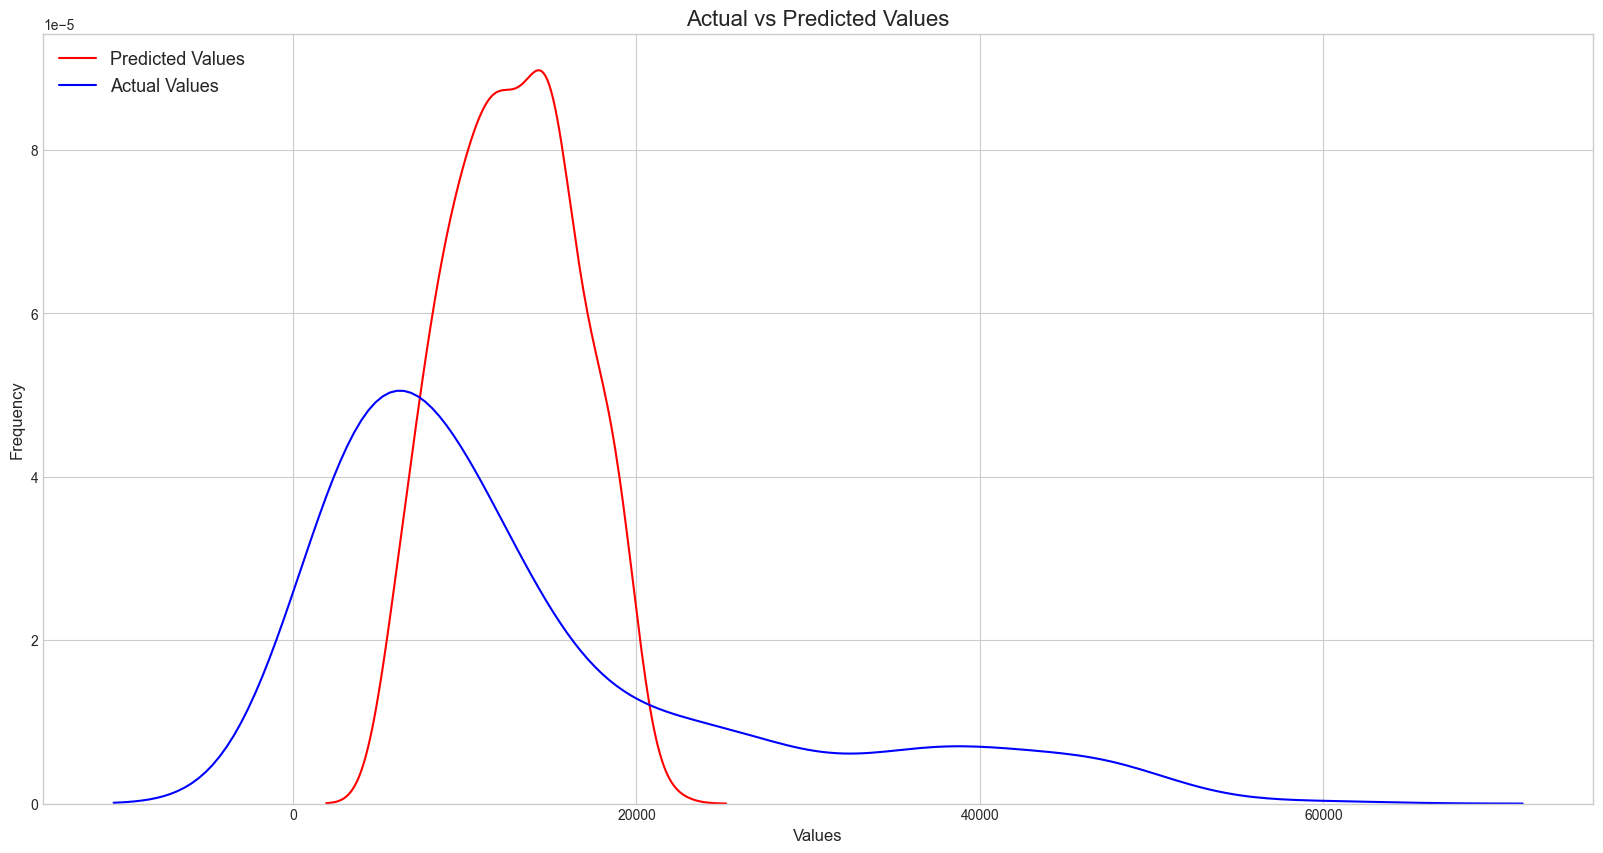

In [35]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## MLR less variables

In [36]:
X1_var = df[['age',
		'bmi',
		'children']]
y_var = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("r2_score : ", r2_score(y_test, yhat))
print("RMSE : ", mean_squared_error(y_test, yhat, squared=False))

r2_score :  0.15511098703444004
RMSE :  11762.595277410126


C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\user\AppData\Local\Temp\ipykernel_18872\501756899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

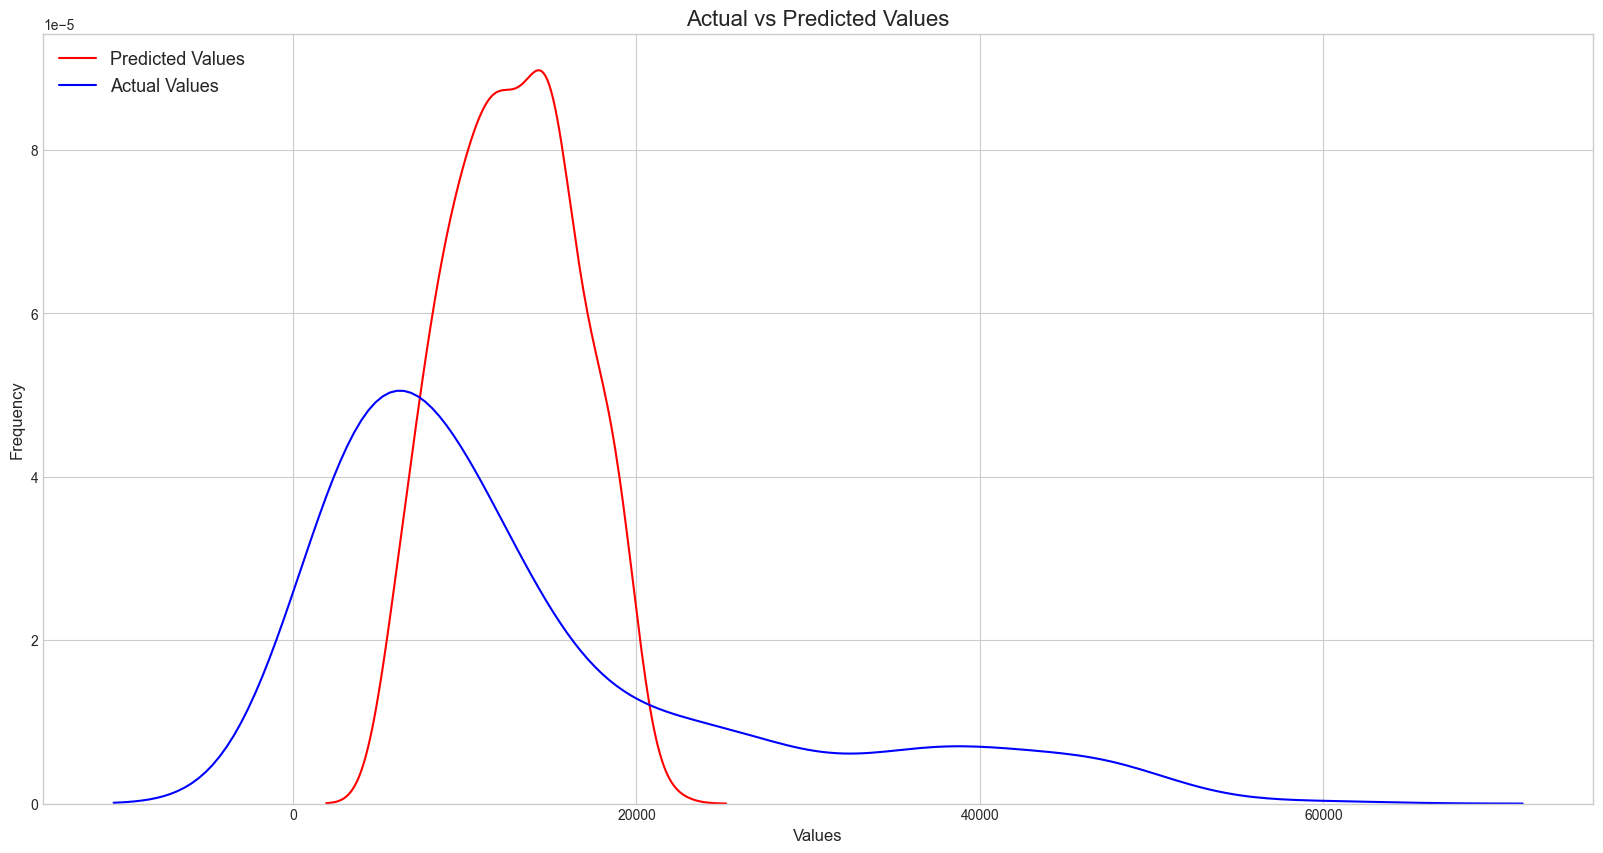

In [38]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)